# Transient flow to a well

## The Theis' well function (a well in a confined aquifer)

The Theis will function is perhaps the most famous, and most often used and practical analytical solution in groundwater science. It describes the transient flow to a fully penetrating well in a confined aquifer after the well starts pumping at time zero. The solution is also used for unconfined flow, but then it is an approximation that is good as long as the thickness of the aquifer does not change substantially, not more thabn 20%, say, from it's initial value.

![Situation considered by Theis confined](./pictures/TheisSituationConfined.png)

Figure: The situation considered by Theis (confined aquifer)

![Situation considered by Theis unconfined](./pictures/TheisSituationUnconfined.png)

Figure: The situation considered by Theis (unconfined aquifer, s<<h)

In cases with wells that are only partially penetrating the aquifer, we can add the influence of that separately as we will see.

Although the solution was derived for a uniform and unchanging ambient groundwater head, it can still be applied in much more general situations, because we can use superpositioin, that is, we can add the influence of different and indiependent actors that change the groundwater level in space and or in time separately. Therefore, if we can, with a solution like that of Theis, compute the effect of a single well everywhere in the aquifer of any time, we can do for an arbitrary number of wells, simply, by adding their individual effects. Not only this, we can also superimpose other effects that are not due to wells, if we have their analytical solution available.

## Governing partial differential equation solved by Theis

Theis solved the following partial differential equation


![Theis PDE](./pictures/TheisDPE.png)

Figure: Situation to derive the partial differential equation

Continuity for a ring of width $dr$ at radius $r$, see figure, yields:

$$ \frac {\partial Q} {\partial r} = \frac \partial {\partial r} \left(-2 \pi r kD \frac {\partial \phi} {\partial r} \right)= - 2 \pi r S \frac {\partial \phi} {\partial t} $$

For convenience, use drawdown $s$ instead of head $\phi$

$$ s = \phi_0 - \phi $$

$$ \frac {\partial} {\partial r} \left( 2 \pi r kD \frac {\partial s} {\partial r} \right) = 2\pi r S \frac {\partial s} {\partial t} $$

$$ kD \frac {\partial} {\partial r} \left( r \frac {\partial s} {\partial r} \right) = r S \frac {\partial s} {\partial t} $$

Which yields the governing partial differential equation for transient horizointal flow to a well that starts pumping at a fixef flow $Q_0$ at $t=0$:

$$\frac 1 r \frac {\partial s} {\partial r} + \frac {\partial^2 s} {\partial r^2} = \frac S {kD} \frac {\partial s} {\partial t}$$

Which was solved by Theis (1935) subject to the initial condition $s(x,0) = 0$ and boundary conditions $s(\infty, t)=0$ and $2\pi r kD \frac{\partial s}{\partial r} = Q_0$ for $r \rightarrow 0$. (This solution can be readily obtained by means of the Laplace transform).

The dradown according to Theis is mathematically descrbided, by hydrologists, as

$$ s = \frac Q  {2 \pi kD} W \left( \frac {r^2 S} {4 kD t} \right) $$

Where owercse $s$ [L] is the transient drawdown of the groundwater head due to the well,  $Q$ [L3/T] is the well extraction, $kD$ [L2/T] the transmissivity of the aqufier, $S$ [-] the storage coefficient of the aquifer, $r$ [L] the distance to the well center and $t$ [T] time since the well was switched on.

$W(u)$ is the so-called Theis well function, which is a function of only one dimensionless parameter, $u$ that is a combination of $r$, $t$, $S$ and $kD$ as shown.

The name Well Function was given by C.V. Theis (1930). The well function turned out to be a regular mathematical function that already was available under the name `exponential integra1` at the time that Theis developed his formunla. It's form is:

$$ W \left( u \right) = Ei \left( u \right) = \intop_u^\infty \frac {e^{-y}} y dy $$

The function has been tabled in many books on groundwater hydrology and pumping test analysis, among which the book

Kruseman, G.P. and N.A. de Rider (1994) Analysis of Pumping Test Data. ILRI publication 47, Wageningen, The Netherlands, 1970 to 1994. ISBN 90 70754 207.

The print of the book of the year 2000 is available on the internet: [KrdR 2000](http://www.hydrology.nl/images/docs/dutch/key/Kruseman_and_De_Ridder_2000.pdf)

For verification of self-implemented well functions here is the table of its values form page 294 of the mentioned book:

![Annex 3.2: Values of the Theis well function W(u) for confined aquifers (after Walton 1962)](./pictures/TheisWellFunctionTableFromKrdR2000_p294.png)



## How to get the well function?

In the past we used to look up the well function in a table like the one given. Nowadays, with computing power everywhere, we only use such tables to verify our version of the function when we programmed it ourselves or use one from a scientific library. This is what we'll do here was well.

One way is to see if the function is already available on our computer. Well if you have Maple, Matlab or Python.scipy it is in one form or another. If you don't know where, then searhing the internet is always a good start.

This shows that we have to look for the function `expi` in the module `scipy.special`

In [1]:
import numpy as np
from scipy.special import expi

#help(expi) # remove the first # to show the help for the function expi

The reveals that we have the function
$$ expi = \intop_{-\infty}^u \frac {e^y} y dy $$

By just changing the sign of y to -y we obtain

$$ W(u) = \intop_u^\infty \frac {e^{-y}} y dy = - \intop_{y = -\infty}^{y = u} \frac {e^{y}} y dy $$

Replace $y$ by $-\xi$ the $W(u)$ becomes

$$ W(u) = - \intop_{\xi = \infty}^{\xi = -u} \frac {e^{-\xi}} \xi d \xi = - expi(-u) $$

So that

$$ W(u) = -expi(-u) $$

according to the definition used in `scipy.special.expi`.

    Notice that diferent libraries and books may define the exponential integral differently. The famous `Abramowitz M & Stegun, I (1964) Handbook of Mathematical Functions. Dover`, for example define the exponential function exactly as the theis well function.

We can readily check the expi function using the table from `Kruseman and De Ridder (2000) p294` that was referenced above. Verifying for example the values for `u  = 4, 0.4, 0.04, 0.004 etc to $4^{-10$` can be done as follows:

In [2]:
u = 4 * 10** -np.arange(11.)   # generates values 4, 4e-1, 4e-2 .. 4e-10
print("{:>10s}   {:>10s}".format('u   ', 'wu   '))
for u, wu in zip(u, -expi(-u)):  # makes a list of value pairs [u, W(u)]
    print("{0:10.1e}   {1:10.4e}".format(u, wu))

      u           wu   
   4.0e+00   3.7794e-03
   4.0e-01   7.0238e-01
   4.0e-02   2.6813e+00
   4.0e-03   4.9482e+00
   4.0e-04   7.2472e+00
   4.0e-05   9.5495e+00
   4.0e-06   1.1852e+01
   4.0e-07   1.4155e+01
   4.0e-08   1.6457e+01
   4.0e-09   1.8760e+01
   4.0e-10   2.1062e+01


which is equal to the values in the table.

It''s now convenient to use the familiar form W(u) instead of -expi(-u)

We can define a function for W either as an anonymous function or a regular function. Anonymous functions are called lambdda functions or lambda expressions in Python. In this case:

In [3]:
from scipy.special import expi
W = lambda u : -expi(-u)

Or, alternatively as a regular one-line function:

In [4]:
def W(u):  return -expi(-u)

or in full, so that we don't need the import above and we directly see where the function comes from:

In [5]:
import scipy
W = lambda u: -scipy.special.expi( -u )  # Theis well function

Now we can put this well function immediately to use for answering practical questions. For example: what is the drawdown after $t=1\,d$ at distance $r=350 \, m$ by a well extracting $Q = 2400\, m^3/d$ in an confined aquifer with transmissivity $kD = 2400\, m^2/d$ and storage coefficient $S=0.001$ [-] ?

In [6]:
r = 350; t = 1.; kD=2400; S=0.001; Q=2400
u = r**2 * S / (4 * kD * t)

s = Q/(4 * np.pi * kD) * W(u)  # applying the theis well function according to the book

print("    r = {} m\n\
    t = {} d\n\
    kD = {} m2/d\n\
    S = {} [-]\n\
    Q = {} m3/d\n\
    u = {:.5g} [-]\n\
    W(u) = {:.5g} [-]\n\
    s(r, t) = {:.5g} m".
      format(r, t, kD, S, Q, u, W(u), s))

    r = 350 m
    t = 1.0 d
    kD = 2400 m2/d
    S = 0.001 [-]
    Q = 2400 m3/d
    u = 0.01276 [-]
    W(u) = 3.7969 [-]
    s(r, t) = 0.30215 m


Above we computed $u$ separately to prevent cluttering the expression. Of course, you can define a lambda or regular function to compute like so

In [7]:
u = lambda r, t: r**2 * S / (4 * kD * t)

The lambda function $u$ now takes two parameters like $u(r,t)$ and uses the other parameters $S$ and $kD$ that it finds in the workspace at the moment when the lambda function is created. So don't change $S$ and $kD$ afterwards without redefining $u(r,t)$.

Try this out:

In [8]:
u(r,t)  # yields u as a function of r and t

0.012760416666666666

In [9]:
W(u(r,t))  # given W(u) as a function of r and t

3.7969115073331832

In [10]:
Q/(4 * np.pi * kD) * W(u(r,t)) # gives the drawdown that we had before

0.30214861743728766

It's now straight forward to compute the drawdown for many times like so:

In [11]:
t = np.logspace(-3, 2, 51) # gives 51 times on log scale between 10^(-3) = 0.001 and 10^(2) = 100

This given the following times:

In [12]:
for it, tt in enumerate(t):
    if it % 10 == 0:   print()
    print("%8.3g" % tt, end=" ")


   0.001  0.00126  0.00158    0.002  0.00251  0.00316  0.00398  0.00501  0.00631  0.00794 
    0.01   0.0126   0.0158     0.02   0.0251   0.0316   0.0398   0.0501   0.0631   0.0794 
     0.1    0.126    0.158      0.2    0.251    0.316    0.398    0.501    0.631    0.794 
       1     1.26     1.58        2     2.51     3.16     3.98     5.01     6.31     7.94 
      10     12.6     15.8       20     25.1     31.6     39.8     50.1     63.1     79.4 
     100 

With these times we can compute the drawdown for all these times in a single strike without changing anything to our formula:

In [13]:
s = Q / (4 * np.pi * kD) * W(u(r,t)) # computes s(r,t)
s # shows s(r,t)

array([  1.66884951e-08,   2.85176796e-07,   2.83106391e-06,
         1.82356839e-05,   8.31967240e-05,   2.88203801e-04,
         8.01032536e-04,   1.86616447e-03,   3.77281387e-03,
         6.80385595e-03,   1.11871477e-02,   1.70653500e-02,
         2.44886132e-02,   3.34252649e-02,   4.37821437e-02,
         5.54271204e-02,   6.82090511e-02,   8.19730658e-02,
         9.65709268e-02,   1.11867155e-01,   1.27741957e-01,
         1.44091964e-01,   1.60829602e-01,   1.77881714e-01,
         1.95187846e-01,   2.12698459e-01,   2.30373226e-01,
         2.48179485e-01,   2.66090892e-01,   2.84086266e-01,
         3.02148617e-01,   3.20264351e-01,   3.38422599e-01,
         3.56614690e-01,   3.74833708e-01,   3.93074143e-01,
         4.11331609e-01,   4.29602614e-01,   4.47884381e-01,
         4.66174701e-01,   4.84471817e-01,   5.02774335e-01,
         5.21081143e-01,   5.39391360e-01,   5.57704286e-01,
         5.76019363e-01,   5.94336150e-01,   6.12654295e-01,
         6.30973518e-01,

For a nicer print print t and s next to each other

In [14]:
print("{:>10s}  {:>10s}".format('time', 'drawdown'))
for tt, ss in zip(t, s):
    print("{0:10.3g}  {1:10.3g}".format(tt,ss))

      time    drawdown
     0.001    1.67e-08
   0.00126    2.85e-07
   0.00158    2.83e-06
     0.002    1.82e-05
   0.00251    8.32e-05
   0.00316    0.000288
   0.00398    0.000801
   0.00501     0.00187
   0.00631     0.00377
   0.00794      0.0068
      0.01      0.0112
    0.0126      0.0171
    0.0158      0.0245
      0.02      0.0334
    0.0251      0.0438
    0.0316      0.0554
    0.0398      0.0682
    0.0501       0.082
    0.0631      0.0966
    0.0794       0.112
       0.1       0.128
     0.126       0.144
     0.158       0.161
       0.2       0.178
     0.251       0.195
     0.316       0.213
     0.398        0.23
     0.501       0.248
     0.631       0.266
     0.794       0.284
         1       0.302
      1.26        0.32
      1.58       0.338
         2       0.357
      2.51       0.375
      3.16       0.393
      3.98       0.411
      5.01        0.43
      6.31       0.448
      7.94       0.466
        10       0.484
      12.6       0.503
      15.8 

And of course we can make a plot of these results:

In [15]:
import matplotlib.pyplot as plt   # imports plot functions (matlab style)

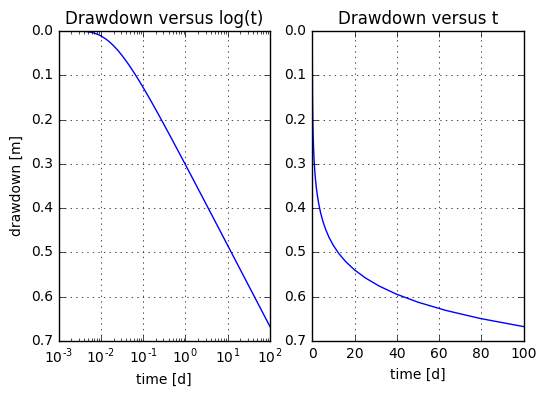

In [16]:
fig = plt.figure()

# Drawdown versus log(t)
ax1 = fig.add_subplot(121)
ax1.set(xlabel='time [d]', ylabel='drawdown [m]', xscale='log', title='Drawdown versus log(t)')
ax1.invert_yaxis()
ax1.grid(True)
plt.plot(t, s)

# Drawdown versus t
ax2 = fig.add_subplot(122)
ax2.set(xlabel='time [d]', ylabel='', xscale='linear', title='Drawdown versus t')
ax2.invert_yaxis()
ax2.grid(True)
plt.plot(t, s)

plt.show()

## Exercises

1. Show the drawdown as a function of r instead of x, for t=2 d and r between 0.1 and 1000 m
2. For the 5 wells of which the lcoations and extractions are given below, show the combined drawdown for time between 0.01 and 10 days at x= 0 and y = 0.

In [17]:
well_names = ['School', 'Lazaret', 'Square', 'Mosque', 'Water_company']
Q = [400., 1200., 1150., 600., 1900]
x = [-300., -250., 100., 55., 125.]
y =[-450., +230., 50., -300., 250.]
Nwells = len(well_names)
x0 = 0.
y0 = 0.

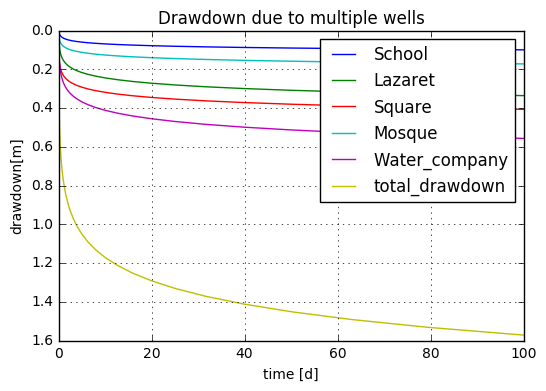

In [18]:
t = np.logspace(-2, 2, 41)
s = np.zeros((Nwells, len(t)))
for iw, Q0, xw, yw  in zip(range(Nwells), Q, y, x):
    r = np.sqrt((xw-x0) ** 2 + (yw - y0) **2)
    s[iw,:] = Q0 / (4 * np.pi * kD) * W(u(r,t))
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(xlabel='time [d]', ylabel='drawdown[m]', title='Drawdown due to multiple wells')
ax.invert_yaxis()
ax.grid(True)
for iw, name in zip(range(Nwells), well_names):
    ax.plot(t, s[iw,:], label=name)
ax.plot(t, np.sum(s, axis=0), label='total_drawdown')
ax.legend()
plt.show()

4. Show the drawdown for the case that the wells start at different times as given here:
(hint: compute use tw = t - ts[iw] for each well and deal met times tw < 0). ts = [0., 5., 2. 8. 1.5.]
5. There is a vertical imermeable boundary at x = -500 m. Show the head as a function of time at x = -10 m and y = 0 m for both the situation
    1. with    
    1. and without    
1. There is a fixed-head boundary (e.g. a fully penetrating river) at x = -500 m. Show the head as a function of time at x=-10 m and y = 0 m for both the situation    
    1. with
    2. and without
1. With the fixed-head boundary. Show the head as a function of time at x = -10 m and y = 0 m for all three cases, where time runs as in t = np.logspace(-2, 2, 41)
1. Show the heads between r = -500 and r = 500 for time = 5 d the three cases, that is
    1. without impermeable or fixed-head boundary at x = -500 m
    2. with the impermeable boundary at x = -500 m
    3. with the fixed head bounary at x = -500.
1. Two vertical impermeable boundaries: Consider not only an impermeable boundary at x = -500 m but also at y = + 200 m. Then using an extraction of Q = 1200 m3/d and times between 0.01 and 100 days, compute the drawdown as a function of time at pooint x= -100.m and y = + 50 m.
1. Consider a fixed-head boundary at x = -500. m and one at y = 200., with an extraction of Q = 1200 m3/d at x= -100. and y = 50 m, compute the drawdown for times between 0.001 and 100 days.
1. Extraction from two different aquifers: Compare two situaations where both aquifers have the same transmissivity kD [m2/d] but different storage coefficient. The extracton from both aquifers is the same, Q = 1200 m3/d. Plot de drawdown as a function of time on a logarithmic scale and determine the shift of the two curves along the time axis. Given an explanation for that shift.

**important** Don't forget to rerun the lambda expressions above, if you change the kD and S, or redefine them so that they take kD and or S as input parameters.